In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [13]:
#testing the url structure (for sanaty checking only)
city = cities[10]
query_url = f"{url}&q={city}"
query_url


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=fortuna'

In [58]:
# List for holding weather status
temp = []
humidity = []
cloudiness = []
wind = []
lat=[]
lng=[]

# Get weather data
for i in range(len(cities)) :
    city = cities[i]
    query_url = f"{url}&q={city}"
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    print(f"{i} - City: {cities[i]} - {weather_response}")
    try:
        temp.append(weather_json["main"]["temp"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        temp.append(float('NaN'))
        humidity.append(float('NaN'))
        cloudiness.append(float('NaN'))
        wind.append(float('NaN'))
        lat.append(float('NaN'))
        lng.append(float('NaN'))
        

0 - City: kruisfontein - <Response [200]>
1 - City: ushuaia - <Response [200]>
2 - City: valleyview - <Response [200]>
3 - City: dikson - <Response [200]>
4 - City: norman wells - <Response [200]>
5 - City: mormugao - <Response [404]>
6 - City: mataura - <Response [200]>
7 - City: rikitea - <Response [200]>
8 - City: ust-maya - <Response [200]>
9 - City: den helder - <Response [200]>
10 - City: fortuna - <Response [200]>
11 - City: berlevag - <Response [200]>
12 - City: okhotsk - <Response [200]>
13 - City: hobart - <Response [200]>
14 - City: bengkulu - <Response [404]>
15 - City: dzerzhinskoye - <Response [200]>
16 - City: te anau - <Response [200]>
17 - City: broken hill - <Response [200]>
18 - City: saint-philippe - <Response [200]>
19 - City: dipkarpaz - <Response [404]>
20 - City: naryan-mar - <Response [200]>
21 - City: albany - <Response [200]>
22 - City: kwinana - <Response [200]>
23 - City: bandarbeyla - <Response [200]>
24 - City: amderma - <Response [404]>
25 - City: puerto

205 - City: torbay - <Response [200]>
206 - City: pevek - <Response [200]>
207 - City: manaure - <Response [200]>
208 - City: zhigansk - <Response [200]>
209 - City: yenagoa - <Response [200]>
210 - City: asau - <Response [404]>
211 - City: saint george - <Response [200]>
212 - City: port-de-paix - <Response [404]>
213 - City: belyy yar - <Response [200]>
214 - City: faanui - <Response [200]>
215 - City: saint-lo - <Response [200]>
216 - City: huicungo - <Response [200]>
217 - City: lata - <Response [200]>
218 - City: chowchilla - <Response [200]>
219 - City: sao jose da coroa grande - <Response [200]>
220 - City: vila franca do campo - <Response [200]>
221 - City: christchurch - <Response [200]>
222 - City: alihe - <Response [200]>
223 - City: tommot - <Response [200]>
224 - City: mount gambier - <Response [200]>
225 - City: divo - <Response [200]>
226 - City: susanville - <Response [200]>
227 - City: tasiilaq - <Response [200]>
228 - City: marfino - <Response [200]>
229 - City: hasak

408 - City: bandar - <Response [200]>
409 - City: ilheus - <Response [200]>
410 - City: gisborne - <Response [200]>
411 - City: dobbs ferry - <Response [200]>
412 - City: wilmington - <Response [200]>
413 - City: puerto penasco - <Response [200]>
414 - City: isetskoye - <Response [200]>
415 - City: termini imerese - <Response [200]>
416 - City: gat - <Response [200]>
417 - City: pangkalanbuun - <Response [200]>
418 - City: new philadelphia - <Response [200]>
419 - City: zirandaro - <Response [200]>
420 - City: san ignacio - <Response [200]>
421 - City: viedma - <Response [200]>
422 - City: kismayo - <Response [404]>
423 - City: iqaluit - <Response [200]>
424 - City: lazarev - <Response [200]>
425 - City: bida - <Response [200]>
426 - City: tura - <Response [200]>
427 - City: nouadhibou - <Response [200]>
428 - City: namatanai - <Response [200]>
429 - City: yazman - <Response [200]>
430 - City: atar - <Response [200]>
431 - City: lathrop - <Response [200]>
432 - City: itaituba - <Respon

612 - City: kibakwe - <Response [200]>
613 - City: takaka - <Response [200]>
614 - City: kulmbach - <Response [200]>
615 - City: san pedro - <Response [200]>
616 - City: plock - <Response [200]>
617 - City: chokwe - <Response [404]>
618 - City: flinders - <Response [200]>
619 - City: handan - <Response [200]>
620 - City: monte escobedo - <Response [200]>
621 - City: sorland - <Response [200]>
622 - City: hyvinkaa - <Response [200]>
623 - City: kamenskoye - <Response [404]>
624 - City: manokwari - <Response [200]>
625 - City: inirida - <Response [200]>
626 - City: karaton - <Response [200]>


In [59]:
#Creating Data Frame
weather_data=pd.DataFrame({"City": cities
                           ,"Temperature": temp
                           ,"Humidity": humidity
                           ,"Cloudiness": cloudiness
                           ,"Wind Speed": wind 
                           ,"Latitude": lat
                           ,"Longitude": lng
                          })
weather_data=weather_data.dropna()
weather_data.head(10)

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,kruisfontein,57.05,86.0,0.0,5.50,-34.00,24.73
1,ushuaia,44.60,52.0,75.0,12.75,-54.81,-68.31
2,valleyview,57.86,85.0,0.0,4.50,55.07,-117.28
3,dikson,51.20,85.0,20.0,11.65,73.51,80.55
4,norman wells,57.20,67.0,40.0,14.99,65.28,-126.83
6,mataura,46.25,83.0,92.0,13.56,-46.19,168.86
7,rikitea,69.83,100.0,56.0,12.10,-23.12,-134.97
8,ust-maya,57.50,90.0,56.0,3.94,60.42,134.54
9,den helder,56.07,93.0,90.0,11.41,52.96,4.76
10,fortuna,76.98,83.0,0.0,3.36,38.18,-1.13


In [72]:
#Exporting Data Frame to CSV
weather_data.to_csv(output_data_file)

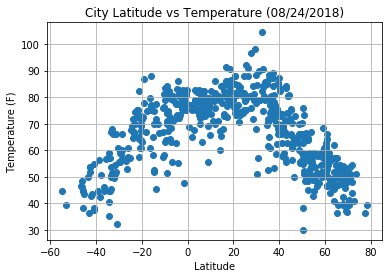

In [68]:
#Temperature (F) vs. Latitude - Scatter Plot
x_axis=weather_data["Latitude"]
y_axis=weather_data["Temperature"]
plt.scatter(x_axis, y_axis)
plt.title("City Latitude vs Temperature (08/24/2018)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Temp_Lat.png")


There is an apparent quadradic relationship between Temperature and City Latiture. Cities with high absolute latitude values are far from equador line and tend to be colder. The Cities with Latitude around 0, are warmer cities by the equador.

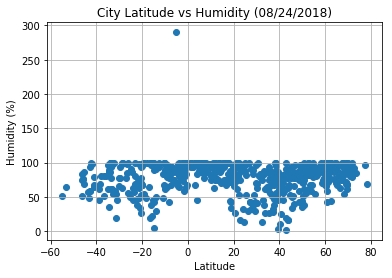

In [69]:
#Humidity (%) vs. Latitude - Scatter Plot
x_axis=weather_data["Latitude"]
y_axis=weather_data["Humidity"]
plt.scatter(x_axis, y_axis)
plt.title("City Latitude vs Humidity (08/24/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Hum_Lat.png")

Two main things can be observed in the above chart:
* There is an outlier point with value around 300%. This is definatly a data issue and can be discarded.
* Althought there is no linear relatinship between Humidity and Latitude, one can observe that the the variance changes according to the latitude. Whereas cities by the equador (lat around 0) have humidities concetrated on high values, the other cities (far from equador) show a higher variance, indicating that other geographic conditions affect their humidity levels.

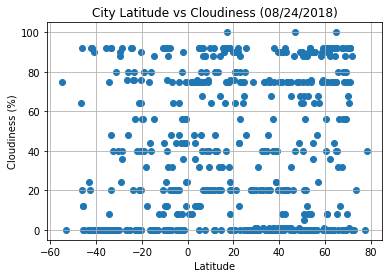

In [70]:
#Cloudiness (%) vs. Latitude - Scatter Plot
x_axis=weather_data["Latitude"]
y_axis=weather_data["Cloudiness"]
plt.scatter(x_axis, y_axis)
plt.title("City Latitude vs Cloudiness (08/24/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Clou_Lat.png")

There is no apparent relationship between cloudiness levels and city latitude. The values are spread over all ranges.

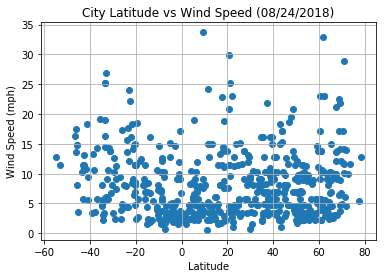

In [71]:
#Wind Speed (mph) vs. Latitude - Scatter Plot
x_axis=weather_data["Latitude"]
y_axis=weather_data["Wind Speed"]
plt.scatter(x_axis, y_axis)
plt.title("City Latitude vs Wind Speed (08/24/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("Wind_Lat.png")

No relationship between Wind Speed and City Latitude.